<a href="https://colab.research.google.com/github/BrunoTrinitario/IA2024-TP/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import math as ma
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, Model
from keras.initializers import glorot_uniform
from keras.layers import Dense, LSTM, Dropout, TimeDistributed, Activation, Input, concatenate
import datetime as dt
import matplotlib.pyplot as plt
import tensorflow as tf

from keras import optimizers
from keras.callbacks import History

In [66]:
def generateData(data_path):
  df=pd.read_csv(data_path)
  anios = df.iloc[:, 0].tolist()
  temperaturas = df.iloc[:, 1].tolist()
  data=df.iloc[:, 2:]
  temperaturas=np.array(temperaturas)
  data=np.array(data)
  return anios,temperaturas,data

def normData(data):
  min=np.min(data)
  max=np.max(data)
  return (data-min)/(max-min)


In [92]:
def modelo(data):
  model = Sequential()
  model.add(LSTM(128, return_sequences= True, input_shape=(1, data.shape[2])))
  model.add(Dropout(0.2))
  model.add(LSTM(128, return_sequences= False))
  model.add(Dropout(0.2))
  model.add(Dense(1, activation= 'linear'))
  model.compile(optimizer=optimizers.Adam(), loss='mse', metrics=['accuracy'])
  return model

In [97]:
def entrenar_modelo(model,epocas,x,y,testx=0,testy=0):
  scores=list()
  histories=list()
  history=model.fit(x, y, epochs=epocas, batch_size=32, verbose=1)
  #_, acc = model.evaluate(testx, testy, verbose=1)
  #print('> %.3f' % (acc * 100.0))
  #scores.append(acc)
  #histories.append(history)
  #return scores, histories, model

In [69]:
def graphYVT(x,y):
  plt.plot(x, y, label='Anio VS. Temp', color='green', linestyle='-', linewidth=2)
  plt.title('Anio VS. Temp')
  plt.xlabel('Anio')
  plt.ylabel('Temperatura')
  plt.show()


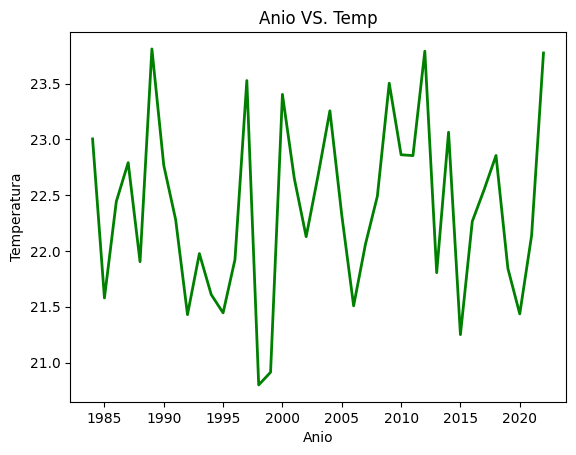

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.0000e+00 - loss: 500.7690
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0000e+00 - loss: 499.0911 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.0000e+00 - loss: 498.0744 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0000e+00 - loss: 496.0186 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0000e+00 - loss: 494.9502
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0000e+00 - loss: 492.4036
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0000e+00 - loss: 491.9439
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0000e+00 - loss: 487.7810 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0000e+00 - loss: 487.0054 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.0000e+00 - loss: 481.5966
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0000e+00 - loss: 477.7735
Epoch 12/50
2/2 ━━━━━━━━━

In [98]:
anios,temperaturas,data=generateData('./trainData.csv')
graphYVT(anios,temperaturas)
data=normData(data)
data=np.expand_dims(data,axis=1)
model=modelo(data)
entrenar_modelo(model,50,data,temperaturas,testx=0,testy=0)